Sylwia Kwiatkowska, sprawozdanie 6

In [2]:
import math
import scipy.integrate as integrate
import matplotlib.pyplot as plt



f = lambda x : math.exp(-2*x)
a, b = 0, 1

#analitycznie: 0.5 - 0.5*e^(-2) ~ 0.4323323583816937

#metoda prostokatow

def met_prostokatow(f, a, b):
    return f((a+b)/2)*(b-a)

def met_trapezow(f, a, b):
    return ((b-a)/2)*(f(a)+f(b))

def simpson(f, a, b):
    return (b-a)*(f(a) + 4*f((a+b)/2) + f(b))/6


"""
Przedział dzielony na mniejsze, h=(b-a)/n
Całkowite pole to suma pól trapezów, pole pierwszego 0.5*h*(f(a)+ ...), następnych ..., ostatniego 0.5*h*(...+f(b))
Stąd końcowy wzór: h*(f(a)+f(b)+ 2*suma f(a+ih))/2
"""
def met_trapezow_zloz(f, a, b, n):
    h = (b-a)/float(n)
    s = (f(a) + f(b))
    for i in range(1,n):
        s = s + 2.*f(a + i*h)
    return float(h*s/2.0)

"""
Całka = h/3 * (f(a) + f(b) + 4*suma(i=1,3,5 do n-1) f(i) + 2*suma(i=2,4,6 do n-2 f(i)))
"""
def simpson_zloz(f, a, b, n):
    h  = (b-a)/float(n) 
    
    suma1, suma2 = 0.0, 0.0
    
    for i in range(1, n, 2):
        suma1 += f(a + i*h)
    
    for i in range(2, n, 2):
        suma2 += f(a + i*h)

    return (h/3) * (f(a) + f(b) + 4*suma1 + 2*suma2)

def romberg(f, a, b):
    return integrate.romberg(f, a, b, tol=10**-6)

def quad(f, a, b):
    return integrate.quad(f, a, b)[0]


x = []
x.append(0.5 - 0.5*math.exp(-2))
x.append(met_prostokatow(f,a,b))
x.append(met_trapezow(f,a,b))
x.append(simpson(f,a,b))
x.append(met_trapezow_zloz(f,a,b,10))
x.append(simpson_zloz(f,a,b,10))
x.append(romberg(f,a,b))
x.append(quad(f,a,b))
print(x)

#obliczenie błędu wyników
blad = []
for i in range(0,len(x)):
    blad.append(abs(x[0] - x[i]))
    
print(blad)


metody = ['1', '2', '3', '4', '5', '6', '7', '8']
plt.figure(figsize=(12,6))
plt.scatter(metody, blad)
plt.title('Wykres błędu całkowania w zależności od metody')
plt.xlabel('Metoda całkowania')
"""
1. metoda analitycznej,
2. metoda prostokątów,
3. prosty wzór trapezów,
4. prosty wzór Simpsona,
5. złożony wzór trapezów (10 podprzedziałów),
6. złożony wzór Simpsona (10 podprzedziałów),
7. metoda Romberga z dokładnością  10−6 ,
8. metoda scipy.integrate.quad.
"""
plt.ylabel('Wartość błędu od wyniku analitycznego')


"""
Największy błąd dla prostego wzoru trapezów - błąd ok 0.13; dla metody prostokątów ok 0.06. Metody złożone oraz wbudowane
funkcje Pythona wykazują błąd zerowy, co oznacza, że dobrze przybliżają całki.
"""

[0.43233235838169365, 0.36787944117144233, 0.5676676416183064, 0.4344755079870637, 0.43377250641846693, 0.43233618311275407, 0.43233235838943557, 0.4323323583816936]
[0.0, 0.06445291721025131, 0.13533528323661276, 0.0021431496053700427, 0.001440148036773281, 3.824731060420028e-06, 7.741918217618604e-12, 5.551115123125783e-17]


'\nNajwiększy błąd dla prostego wzoru trapezów - błąd ok 0.13; dla metody prostokątów ok 0.06. Metody złożone oraz wbudowane\nfunkcje Pythona wykazują błąd zerowy, co oznacza, że dobrze przybliżają całki.\n'

In [3]:
#zad 2
import scipy.optimize as scp
from scipy.stats import norm

f2 = lambda t : math.exp((-t**2)/float(2))/math.sqrt(2*math.pi)

fun1 = lambda x : met_trapezow_zloz(f2,0, x, 10) - 0.45
fun2 = lambda x : simpson_zloz(f2,0, x, 10) - 0.45
x1 = scp.newton(fun1, 0.5, tol=10**-5)
x2 = scp.newton(fun2, 0.5, tol=10**-5)

print(x1)
print(x2)
#P(0<X<x) = P(X<x) - P(X<0) = 0.45
#Wartość referencyjna: 
wart_ref = norm.ppf(0.45+norm.cdf(0))
print(wart_ref)

blad1 = abs(x1-wart_ref)
blad2 = abs(x2-wart_ref)
print(blad1>blad2)
"""
Wartość bardziej zbliżoną do referencyjnej można otrzymać, posługując się złożoną metodą Simpsona. 
Jednakże wartości obliczone obiema metodami są bardzo bliskie wartości referencyjnej i stanowią dobre przybliżenie.
"""

1.6485764163808694
1.6448517617362421
1.6448536269514722
True


'\nWartość bardziej zbliżoną do referencyjnej można otrzymać, posługując się złożoną metodą Simpsona. \nJednakże wartości obliczone obiema metodami są bardzo bliskie wartości referencyjnej i stanowią dobre przybliżenie.\n'

In [7]:
#zad 3
from scipy.interpolate import interp1d
import numpy as np
czas = np.array([0.0, 0.5, 1.0, 2.0, 3.0, 4.0])
a_ = np.array([-4.5, -4.5, -2.3, -1.0, -0.5, 0.0])
a = interp1d(czas, a_) #funkcja a(t)

v_0 = met_trapezow_zloz(a, 4.0, 0.0, 50) 
#całka od 4 do t z a = v(t)-v(4)=v(t)-0 = v(t)
print("v_0: ",v_0)
v = lambda t : met_trapezow_zloz(a, 4.0, t, 50) #funkcja v(t)

#s(0)=0 -> droga hamowania=s(4.0)
#całka od 0 do t z v = s(t)-s(0)=s(t)
s = lambda t : met_trapezow_zloz(v, 0, t, 50)

s_ham = s(4.0)
print("Droga hamowania: ", abs(s_ham))
v_sr=(s(0.5)-s(0))/0.5
print("Prędkość średnia: ", v_sr)

v_0:  6.5998399999999995
Droga hamowania:  6.82773527552
Prędkość średnia:  5.474819380799999


110.63484780895669
110.63484780895666
158.25159885482952


'\nW obu przypadkach uzyskane wartości różnią się od wartości obliczonej metodą Romberga. Analizując wykres, można dostrzec, że\nmetody dają wynik zbliżony do uzyskanego metodą Romberga tylko w 8 punktach - dla danych ilości poprzedziałów.\nIm więcej podprzedziałów, tym stabilniejszy wykres.\n'

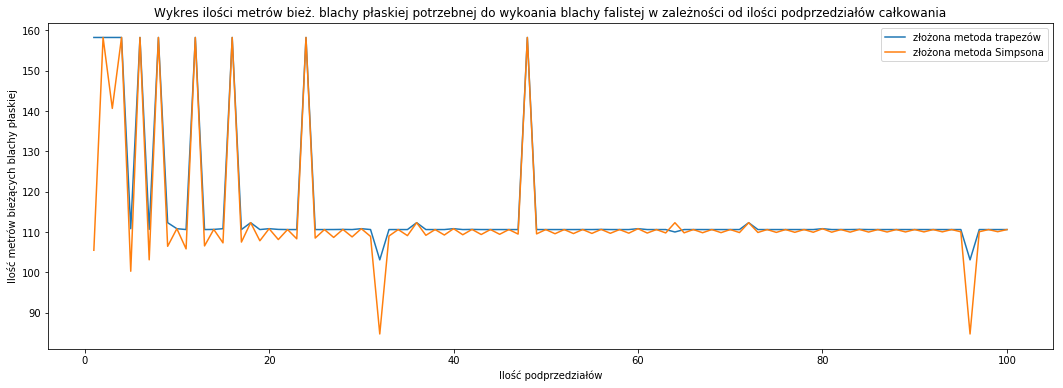

In [6]:
#zad 4
from scipy.misc import derivative

#w decymetrach
A, T, l = 1, 2, 48
#f(x)=sin(pi*x)

f = lambda x : math.sin(math.pi*x)
dx = lambda x : math.pi* math.cos(math.pi*x)



#wzór na długość łuku krzywej: L=całka(od a do b) sqrt(1+ (f'(x))^2 )
f_podcalk = lambda x : math.sqrt(1 + math.pow(dx(x), 2))

x1 =  met_trapezow_zloz(f_podcalk, 0, l, 50)
print(x1)
x2 = simpson_zloz(f_podcalk, 0, l, 50)
print(x2)
x3 = romberg(f_podcalk, 0, l)
print(x3)

trap = []
simps = []
nr = []
for i in range(1, 101):
    nr.append(i)
    trap.append(met_trapezow_zloz(f_podcalk, 0, l, i))
    simps.append(simpson_zloz(f_podcalk, 0, l, i))

plt.figure(figsize=(18,6))
plt.plot(nr, trap, label = "złożona metoda trapezów")
plt.plot(nr, simps, label = "złożona metoda Simpsona")
plt.legend()
plt.xlabel("Ilość podprzedziałów")
plt.ylabel("Ilość metrów bieżących blachy płaskiej")
plt.title("Wykres ilości metrów bież. blachy płaskiej potrzebnej do wykoania blachy falistej w zależności od ilości podprzedziałów całkowania")



"""
W obu przypadkach uzyskane wartości różnią się od wartości obliczonej metodą Romberga. Analizując wykres, można dostrzec, że
metody dają wynik zbliżony do uzyskanego metodą Romberga tylko w 8 punktach - dla danych ilości poprzedziałów.
Im więcej podprzedziałów, tym stabilniejszy wykres.
"""